In [4]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import h5py

In [13]:
nx = 300
ny = 1000
time_span = 1000
receiver = 300
receiver2 = 75
showX =  200 # coordinate of x to compare slices

Y2 = np.zeros([time_span,receiver])
nimg = np.zeros([time_span,receiver])
X0 = np.zeros([time_span,receiver2])

g = h5py.File('/home1/data/wangrongqian/denoise/test4sr.h5', 'r')
Y2[:,:] = g['Y2'][:,:]
X0[:,:] = g['X0'][:,:]
g.close()

for iii in range(time_span):
    for jjj in range(receiver2):
        nimg[iii,4*jjj] = X0[iii,jjj]
'''
nx, ny = 200, 200
# Generate image
img = 100.0*np.ones((nx,ny))
img[75:150,75:150] = 150.0
# Adding Gaussian noise
nmean, nsigma = 0.0, 12.0
nimg = np.random.normal(nmean,nsigma,(nx,ny)) + img
'''


'\nnx, ny = 200, 200\n# Generate image\nimg = 100.0*np.ones((nx,ny))\nimg[75:150,75:150] = 150.0\n# Adding Gaussian noise\nnmean, nsigma = 0.0, 12.0\nnimg = np.random.normal(nmean,nsigma,(nx,ny)) + img\n'

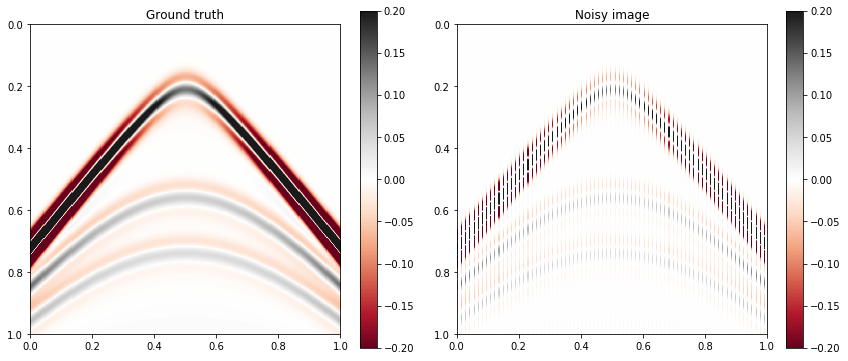

In [14]:
# Plot images
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.title('Ground truth')   
plt.imshow(Y2,cmap='RdGy',vmax=0.2,vmin=-0.2,extent=([0,1,1,0]))
plt.colorbar(shrink=0.4)

plt.subplot(1,2,2)
plt.title('Noisy image')   
plt.imshow(nimg,cmap='RdGy',vmax=0.2,vmin=-0.2,extent=([0,1,1,0]))
plt.colorbar(shrink=0.4)

plt.tight_layout()
plt.show()

$\min _{u}\|u-f\|_{2}^{2}+\lambda\|\nabla u\|_{2}^{2}$:<p>
Euler-Lagrange equation: 
    $$-2\lambda (u_{xx}+u_{yy})+2(u-f)=0$$<p>
    $$u_{t}=\lambda (u_{xx}+u_{yy})-(u-f)$$

In [76]:
# initialize parameter
lambd = 0.1
dt = 1
iteration = 100

I_t = nimg[:]
I_tplus = nimg[:]

# iteration
for t in range(iteration):
    for i in range(ny):
        for j in range(nx):
            iUp = i - 1
            iDown = i + 1
            jLeft = j - 1
            jRight = j + 1
            # boundary condition
            if (0 == i):
                iUp = i
            if (ny - 1 == i):
                iDown = i
            if (0 == j):
                jLeft = j 
            if (nx - 1 == j):
                jRight = j
            u_xx = I_t[i][jRight] + I_t[i][jLeft] - 2 * I_t[i][j]
            u_yy = I_t[iDown][j] + I_t[iUp][j] - 2 * I_t[i][j]
            I_tplus[i][j] = I_t[i][j] + dt * (lambd * (u_xx + u_yy) - (I_t[i][j] - nimg[i][j]))
            
    I_t = I_tplus[:]

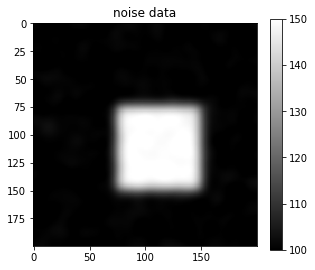

In [77]:
# Plot noise image
plt.figure(figsize=(5,5))
plt.title('noise data')   
plt.imshow(I_t,cmap='gray',vmax=150,vmin=100)
plt.colorbar(shrink=0.85)

In [15]:
# initialize parameter
lambd = 1.2      
dt = 0.2
ep = 1         #gradient regularization, otherwise denominator is 0
iteration = 100

I_t = nimg[:]
I_tplus = nimg[:]

# iteration
for t in range(iteration):
    for i in range(ny):
        for j in range(nx):
            iUp = i - 1
            iDown = i + 1
            jLeft = j - 1
            jRight = j + 1
            # boundary condition
            if (0 == i):
                iUp = i
            if (ny - 1 == i):
                iDown = i
            if (0 == j):
                jLeft = j 
            if (nx - 1 == j):
                jRight = j
            u_x = (I_t[i][jRight] - I_t[i][jLeft]) / 2.0
            u_y = (I_t[iDown][j] - I_t[iUp][j]) / 2.0
            u_xx = I_t[i][jRight] + I_t[i][jLeft] - 2 * I_t[i][j]
            u_yy = I_t[iDown][j] + I_t[iUp][j] - 2 * I_t[i][j]
            u_xy = (I_t[iDown][jRight] + I_t[iUp][jLeft] - I_t[iUp][jRight] - I_t[iDown][jLeft]) / 4.0
            num = u_yy * (u_x * u_x + ep) + u_xx * (u_y * u_y + ep) - 2 * u_x * u_y * u_xy
            den = pow(u_x * u_x + u_y * u_y + ep, 1.5)
            I_tplus[i][j] = I_t[i][j] + dt * (lambd * (num / den) - (I_t[i][j] - nimg[i][j]))
            
    I_t = I_tplus[:]

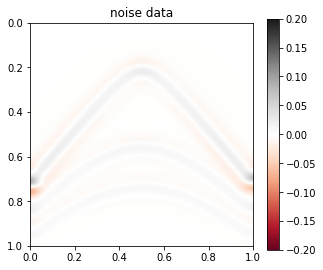

In [16]:
# Plot noise image
plt.figure(figsize=(5,5))
plt.title('noise data')   
plt.imshow(I_t,cmap='RdGy',vmax=0.2,vmin=-0.2,extent=([0,1,1,0]))
plt.colorbar(shrink=0.85)